#Solution 3

In [28]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from scipy import stats
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Generate data with 330 images of digits
digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:330]]
y = digits.target[indices[:330]]
images = digits.images[indices[:330]]

n_total_samples = len(y)
n_labeled_points = 10
unlabeled_data_set = np.arange(n_total_samples)[n_labeled_points:]

# Function for label propagation
def LabelPropagation(X, y, tolerence=0.001, max_iter=300):
    graph_matrix = kneighbors_graph(X, 7, mode='connectivity', include_self=True)
    classes = np.unique(y)
    classes = classes[classes != -1]
    y = np.asarray(y)
    unlabeled = y == -1

    Y1 = np.zeros((len(y), len(classes)))
    for label in classes:
        Y1[y == label, classes == label] = 1

    Y0 = np.copy(Y1)
    Y_prev = np.zeros((X.shape[0], len(classes)))
    unlabeled = unlabeled[:, np.newaxis]

    for n_iter_ in range(max_iter):
        if np.abs(Y1 - Y_prev).sum() < tolerence:
            break

        Y_prev = Y1
        Y1 = graph_matrix @ Y1
        normalizer = np.sum(Y1, axis=1)[:, np.newaxis]
        normalizer[normalizer == 0] = 1
        Y1 /= normalizer
        Y1 = np.where(unlabeled, Y1, Y0)

    F_u = classes[np.argmax(Y1, axis=1)]
    return F_u, classes, Y1


    # Display heat map of the Confusion matrix
def CM(cm, labels):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()

    # Print model details
def PrintModel(true_labels, predicted_labels, labels, labeled_points):
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    a = accuracy_score(true_labels, predicted_labels)

    print("Label propagation model: %d labeled & %d unlabeled points (%d total)" % (labeled_points, n_total_samples - labeled_points, n_total_samples))
    print("Accuracy: ", '{:.1%}'.format(a))
    print("Confusion matrix")
    print(cm)
    print("\n")
    CM(cm, labels)
    print("\n")

    # Plot certain digits of high confidence variables
def plotCertainNumbers(certain_index, Fu, y):
    f = plt.figure(figsize=(6, 5))
    plt.suptitle("")
    for index, image_index in enumerate(certain_index):
        image = images[image_index]
        sub = f.add_subplot(1, 5, index + 1)
        sub.imshow(image, cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        sub.set_title('predict: %i\ntrue: %i' % (Fu[image_index], y[image_index]))
    plt.show()


We execute a learning algorithm in which we select the next set of labeled predictors by choosing 5 predicted labels with high confidence.

Label propagation model: 10 labeled & 320 unlabeled points (330 total)
Accuracy:  56.6%
Confusion matrix
[[ 0  5  0  0  0 24  0]
 [ 0 29  0  0  2  0  0]
 [ 0  0 13  0  0  0 22]
 [ 0  0  0 40  0  0  0]
 [ 0  0  0  0 36  0  0]
 [ 0  0  0  1  0 32  0]
 [ 0  0  3  0  3  0 31]]




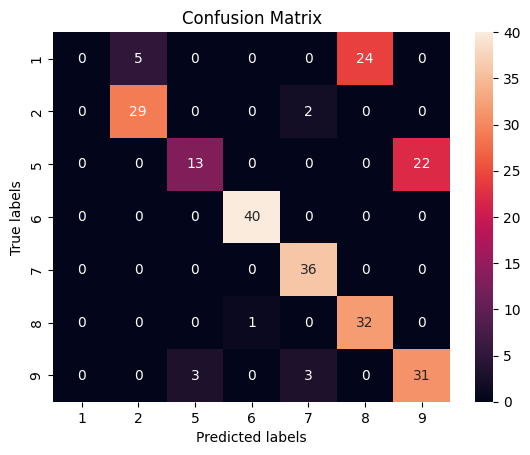

/usr/local/lib/python3.10/dist-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


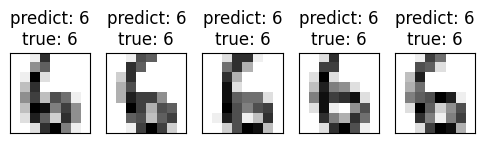

Label propagation model: 15 labeled & 315 unlabeled points (330 total)
Accuracy:  55.9%
Confusion matrix
[[ 0  5  0  0  0 24  0]
 [ 0 29  0  0  2  0  0]
 [ 0  0 13  0  0  0 22]
 [ 0  0  0 35  0  0  0]
 [ 0  0  0  0 36  0  0]
 [ 0  0  0  1  0 32  0]
 [ 0  0  3  0  3  0 31]]




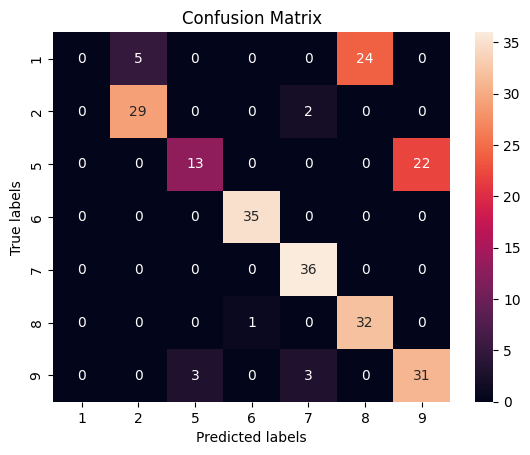

/usr/local/lib/python3.10/dist-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


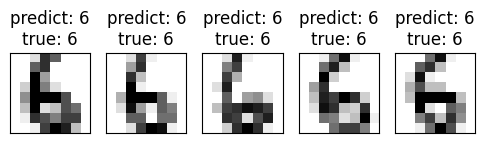

Label propagation model: 20 labeled & 310 unlabeled points (330 total)
Accuracy:  55.2%
Confusion matrix
[[ 0  5  0  0  0 24  0]
 [ 0 29  0  0  2  0  0]
 [ 0  0 13  0  0  0 22]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 36  0  0]
 [ 0  0  0  1  0 32  0]
 [ 0  0  3  0  3  0 31]]




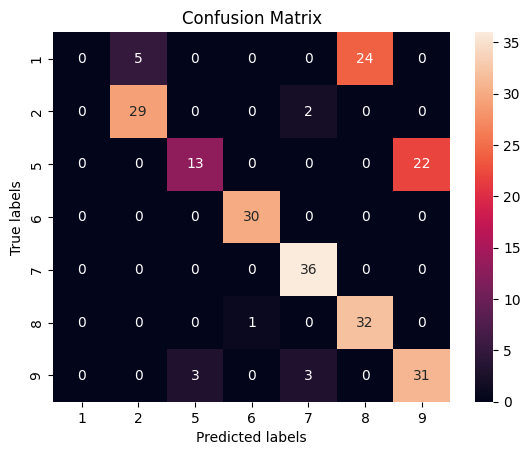

/usr/local/lib/python3.10/dist-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


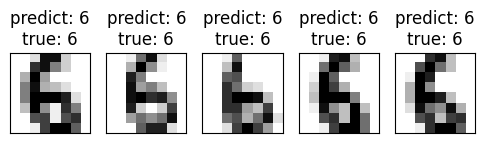

Label propagation model: 25 labeled & 305 unlabeled points (330 total)
Accuracy:  54.1%
Confusion matrix
[[ 0  5  0  0  0 24  0]
 [ 0 29  0  0  2  0  0]
 [ 0  0 13  0  0  0 22]
 [ 0  0  0 25  0  0  0]
 [ 0  0  0  0 36  0  0]
 [ 0  0  0  2  0 31  0]
 [ 0  0  3  0  3  0 31]]




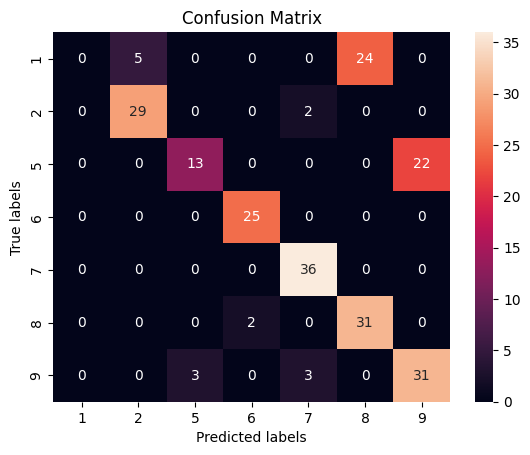

/usr/local/lib/python3.10/dist-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


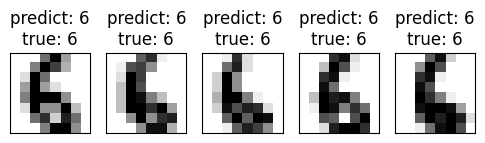

Label propagation model: 30 labeled & 300 unlabeled points (330 total)
Accuracy:  53.3%
Confusion matrix
[[ 0  5  0  0  0 24  0]
 [ 0 29  0  0  2  0  0]
 [ 0  0 13  0  0  0 22]
 [ 0  0  0 20  0  0  0]
 [ 0  0  0  0 36  0  0]
 [ 0  0  0  2  0 31  0]
 [ 0  0  3  0  3  0 31]]




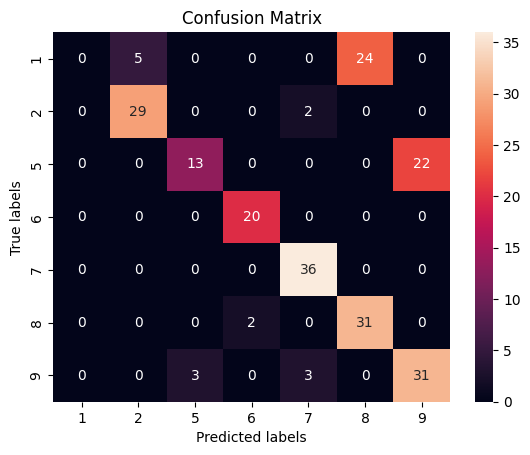

/usr/local/lib/python3.10/dist-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


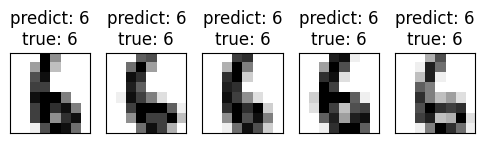

In [29]:
# Learning algorithm with high confidence predicted labels
for i in range(5):
    y_train = np.copy(y)
    y_train[unlabeled_data_set] = -1

    Fu, labels, Y1 = LabelPropagation(X, y_train, tolerence=0.001, max_iter=300)

    predicted_labels = Fu[unlabeled_data_set]
    true_labels = y[unlabeled_data_set]

    PrintModel(true_labels, predicted_labels, labels, n_labeled_points)

    pred_entropies = stats.distributions.entropy(Y1.T)
    certain_index = np.argsort(pred_entropies)[::1]
    certain_index = certain_index[np.in1d(certain_index, unlabeled_data_set)][:5]

    plotCertainNumbers(certain_index, Fu, y)

    delete_indices = np.array([], dtype=int)
    unlabeled_data_set = np.setdiff1d(unlabeled_data_set, certain_index)
    n_labeled_points+= len(certain_index)

The aforementioned analysis indicates that opting for high-accuracy labels negatively impacts the overall accuracy.

Subsequently, we proceed with a comparable exercise, this time selecting labels with low confidence, and assess the outcomes.

Label propagation model: 10 labeled & 320 unlabeled points (330 total)
Accuracy:  56.6%
Confusion matrix
[[ 0  5  0  0  0 24  0]
 [ 0 29  0  0  2  0  0]
 [ 0  0 13  0  0  0 22]
 [ 0  0  0 40  0  0  0]
 [ 0  0  0  0 36  0  0]
 [ 0  0  0  1  0 32  0]
 [ 0  0  3  0  3  0 31]]




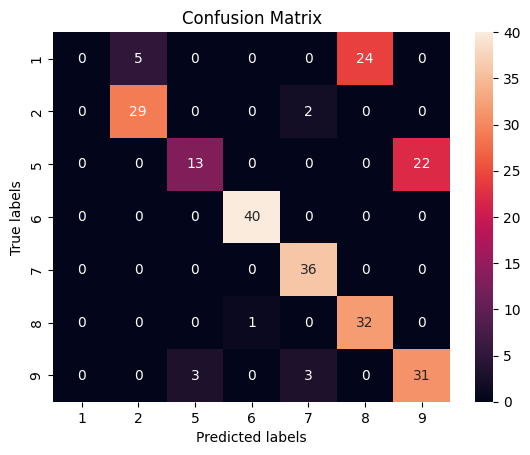

/usr/local/lib/python3.10/dist-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


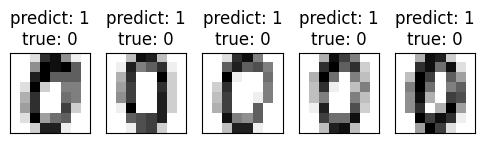

Label propagation model: 15 labeled & 315 unlabeled points (330 total)
Accuracy:  62.9%
Confusion matrix
[[19  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0 24  0]
 [ 1  0 28  0  0  2  0  0]
 [ 0  0  0 13  0  0  0 22]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 36  0  0]
 [ 0  0  0  0  1  0 32  0]
 [ 1  0  0  3  0  3  0 30]]




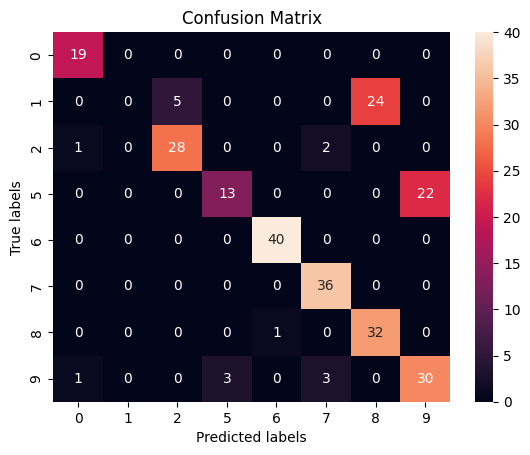

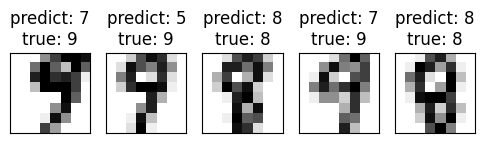

Label propagation model: 20 labeled & 310 unlabeled points (330 total)
Accuracy:  61.9%
Confusion matrix
[[19  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0 21  3]
 [ 1  0 28  0  0  2  0  0]
 [ 0  0  0 13  0  0  0 22]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 32  0  4]
 [ 0  0  0  0  1  0 30  0]
 [ 1  0  0  1  0  0  2 30]]




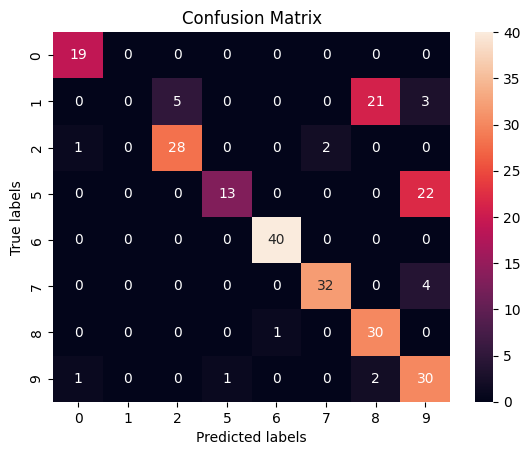

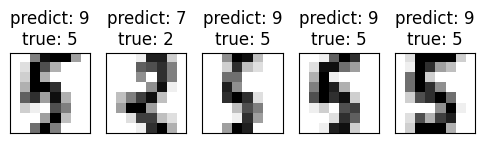

Label propagation model: 25 labeled & 305 unlabeled points (330 total)
Accuracy:  65.6%
Confusion matrix
[[19  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0 21  3]
 [ 1  0 29  0  0  0  0  0]
 [ 0  0  0 21  0  0  0 10]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 32  0  4]
 [ 0  0  0  0  1  0 30  0]
 [ 1  0  0  2  0  0  2 29]]




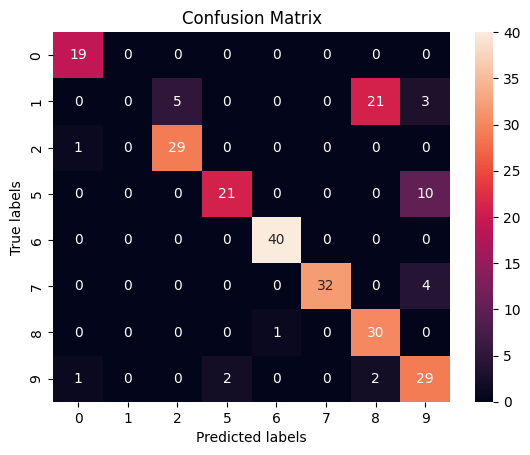

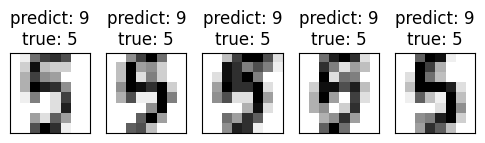

Label propagation model: 30 labeled & 300 unlabeled points (330 total)
Accuracy:  68.0%
Confusion matrix
[[19  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0 21  3]
 [ 1  0 29  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  1]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 32  0  4]
 [ 0  0  0  0  1  0 30  0]
 [ 1  0  0  2  0  0  2 29]]




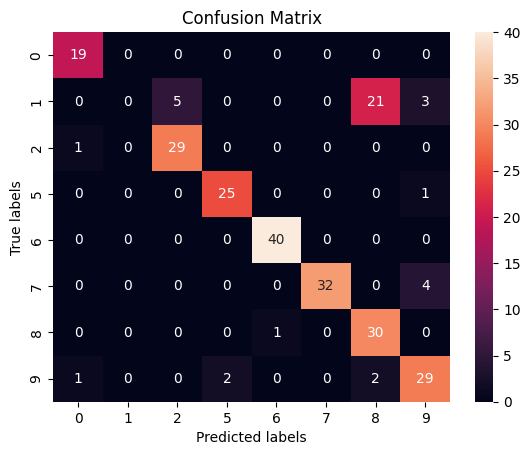

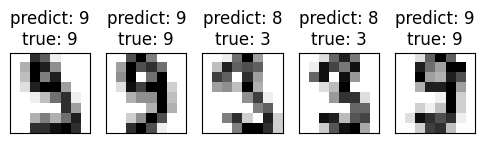

In [26]:
# Again Generate data with 330 images of digits because variables needs to be reintalized.
digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:330]]
y = digits.target[indices[:330]]
images = digits.images[indices[:330]]

n_total_samples = len(y)
n_labeled_points = 10
unlabeled_data_set = np.arange(n_total_samples)[n_labeled_points:]

# Learning algorithm with low confidence predicted labels
for i in range(5):
    y_train = np.copy(y)
    y_train[unlabeled_data_set] = -1

    Fu, labels, Y1 = LabelPropagation(X, y_train, tolerence=0.001, max_iter=300)

    predicted_labels = Fu[unlabeled_data_set]
    true_labels = y[unlabeled_data_set]

    PrintModel(true_labels, predicted_labels, labels, n_labeled_points)

    pred_entropies = stats.distributions.entropy(Y1.T)
    certain_index = np.argsort(pred_entropies)[::-1]
    certain_index = certain_index[np.in1d(certain_index, unlabeled_data_set)][:5]

    plotCertainNumbers(certain_index, Fu, y)

    delete_indices = np.array([], dtype=int)
    unlabeled_data_set = np.setdiff1d(unlabeled_data_set, certain_index)
    n_labeled_points+= len(certain_index)

Conclusion:   

The algorithm exhibits a favorable learning curve and achieves improved accuracy results.